In [31]:
library(forecast)

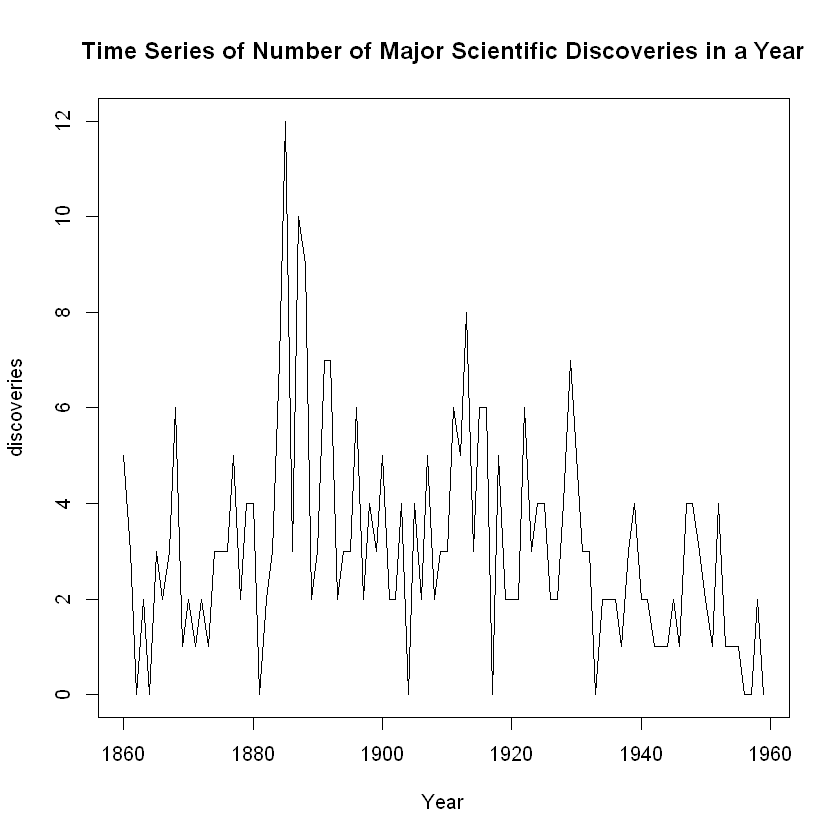

In [3]:
data(discoveries)
plot(discoveries, xlab='Year', main='Time Series of Number of Major Scientific Discoveries in a Year')

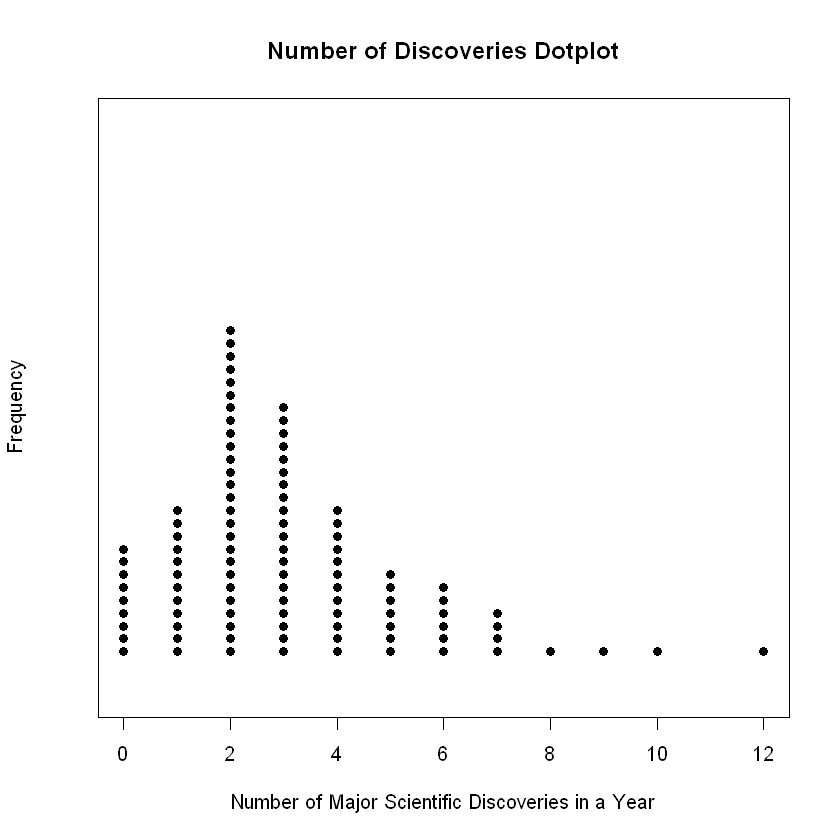

In [4]:
stripchart(discoveries, method = "stack", offset=.5, at=.15,pch=19,
            main="Number of Discoveries Dotplot",
            xlab="Number of Major Scientific Discoveries in a Year",
            ylab="Frequency")

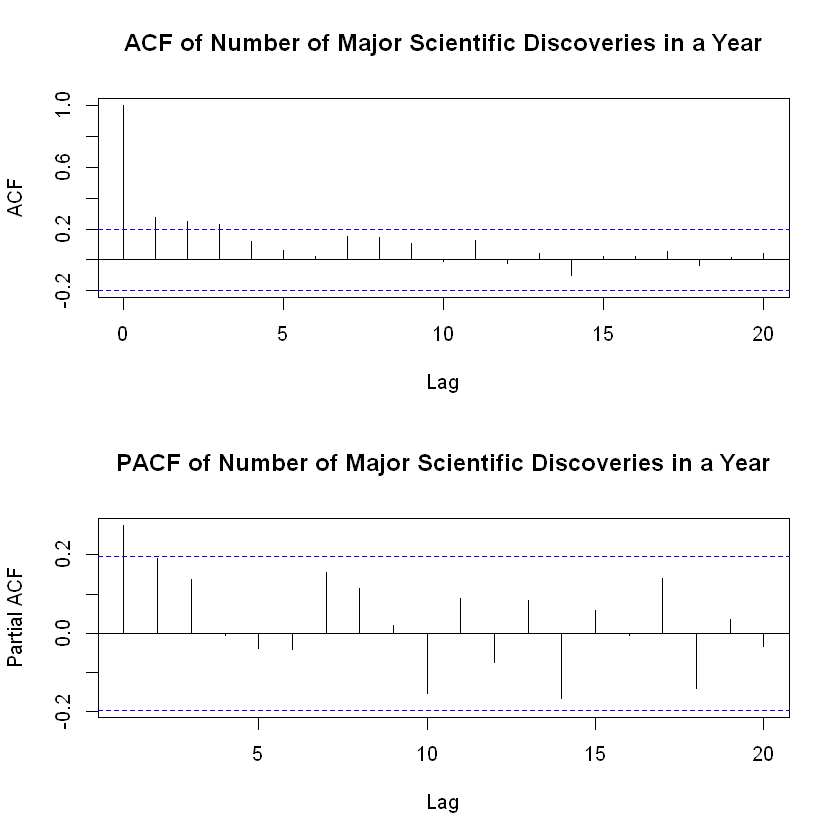

In [6]:
par(mfcol = c(2,1))
acf(discoveries, main="ACF of Number of Major Scientific Discoveries in a Year")
pacf(discoveries, main="PACF of Number of Major Scientific Discoveries in a Year")

#### There are three spikes above noise in ACF, and one (almost two!) on PACF. Thus, different values for p and q are tested and the AIC values of the fitted model are obtained.

In [18]:
p = NULL
q = NULL
p = c(0,1,2,3)
q = c(0,1,2)

In [20]:
length(p)

[1] 4

In [28]:
for (i in 1:length(p)){
    for (j in 1:length(q)){
        model <- arima(discoveries, order=c(p[i],0,q[j]))
        print(paste('AIC(arima(',p[i],', 0,',q[j],'):', model$aic))
    }
}

[1] "AIC(arima( 0 , 0, 0 ): 449.329705052099"
[1] "AIC(arima( 0 , 0, 1 ): 445.589542150875"
[1] "AIC(arima( 0 , 0, 2 ): 444.674166857197"
[1] "AIC(arima( 1 , 0, 0 ): 443.379221032797"
[1] "AIC(arima( 1 , 0, 1 ): 440.19799673203"
[1] "AIC(arima( 1 , 0, 2 ): 442.042784400099"
[1] "AIC(arima( 2 , 0, 0 ): 441.615519907434"
[1] "AIC(arima( 2 , 0, 1 ): 442.072216744749"
[1] "AIC(arima( 2 , 0, 2 ): 443.702089160251"
[1] "AIC(arima( 3 , 0, 0 ): 441.56580952356"
[1] "AIC(arima( 3 , 0, 1 ): 443.565473386679"
[1] "AIC(arima( 3 , 0, 2 ): 439.926328571455"


#### The smallest value corresponds to arima(3,0,2). Also, the AIC of arima(1,0,1) is only slightly larger that this value. I prefer using a model with lower orders and will use (1,0,1) to make estimates.

In [29]:
arima(discoveries, order=c(1,0,1))


Call:
arima(x = discoveries, order = c(1, 0, 1))

Coefficients:
         ar1      ma1  intercept
      0.8353  -0.6243     3.0208
s.e.  0.1379   0.1948     0.4728

sigma^2 estimated as 4.401:  log likelihood = -216.1,  aic = 440.2

#### Now, let's repeat this process using an automated procedure with 'forecast' library. Specifying d=0 will prevent applying a differencing on the measurements.

In [37]:
auto.arima(discoveries, ic='aic', d=0, approximation=TRUE)

Series: discoveries 
ARIMA(1,0,1) with non-zero mean 

Coefficients:
         ar1      ma1    mean
      0.8353  -0.6243  3.0208
s.e.  0.1379   0.1948  0.4728

sigma^2 estimated as 4.538:  log likelihood=-216.1
AIC=440.2   AICc=440.62   BIC=450.62

#### It seems that the model that 'auto.arima' picks is the same as the one we picked through manual comparison when the 'approximation' is set to TRUE.

In [38]:
auto.arima(discoveries, ic='aic', d=0, approximation=FALSE)

Series: discoveries 
ARIMA(3,0,0) with non-zero mean 

Coefficients:
         ar1     ar2     ar3    mean
      0.1967  0.1613  0.1451  3.0637
s.e.  0.0995  0.0998  0.1007  0.4136

sigma^2 estimated as 4.556:  log likelihood=-215.78
AIC=441.57   AICc=442.2   BIC=454.59

#### Let's try a different criterion. This time I will use Bayesian information criterion (BIC) with approximation set to TRUE.

In [39]:
auto.arima(discoveries, ic='bic', d=0, approximation=TRUE)

Series: discoveries 
ARIMA(1,0,0) with non-zero mean 

Coefficients:
         ar1    mean
      0.2787  3.0954
s.e.  0.0967  0.2975

sigma^2 estimated as 4.737:  log likelihood=-218.69
AIC=443.38   AICc=443.63   BIC=451.19

#### According to this criterion, arima(1,0,0) is the best fit to the 'discoveries' time series.